# Preliminary Visualization: Sample Data

Note that you may have to download a package called basemap. This can easily be done by running 'conda install basemap'. It also installs the necessary dependencies.

In [7]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from mpl_toolkits.basemap import Basemap

from pylab import rcParams
rcParams['figure.figsize'] = 15, 15

**Tangent**: Interesting visualization on New York traffic:
    http://www.wired.com/2010/05/ff_komanoff_traffic/

#### Columns (Portuguese to English)
    Contem data do evento --> date of event
    Data do AVL, --> date of AVL
    Codigo de linha AVL --> AVL line of code
    Latitude --> lat
    Longitude --> lon
    Identificador AVL --> identifier AVL 


In [38]:
df = pd.read_csv('raw_data/registro-de-posicao-a-data.csv', header=None, names=['Event Date', 'AVL date', 'AVL line of code', 'lat', 'lon', 'identifier AVL'])
df.head()

,Event Date,AVL date,AVL line of code,lat,lon,identifier AVL
0,2013-08-24 18:59:34.803,2013-08-24 18:16:19.000,34766,-23.736918,-46.776485,41292
1,2013-08-24 18:59:34.790,2013-08-24 00:35:59.000,1428,-23.538513,-46.753928,14518
2,2013-08-24 18:59:34.820,2013-08-24 18:48:57.000,33146,-23.535275,-46.582367,35389
3,2013-08-24 18:59:34.837,2013-08-24 00:34:10.000,1663,-23.639893,-46.601290,11145
4,2013-08-24 18:59:34.843,2013-08-24 00:34:23.000,1354,-23.541658,-46.510520,55986


How big is the dataset?

In [36]:
df.shape

(200000, 6)

#### Is the identifier column unique? What does it represent?

The identifier column most likely identifies a bus.

In [53]:
df.groupby('identifier AVL').count()[:10]

,Event Date,AVL date,AVL line of code,lat,lon
identifier AVL,,,,,
8513,6,6,6,6,6
8514,5,5,5,5,5
8516,12,12,12,12,12
8518,21,21,21,21,21
8521,2,2,2,2,2
8523,13,13,13,13,13
8524,14,14,14,14,14
8528,1,1,1,1,1
8529,8,8,8,8,8


In [56]:
df.groupby('AVL line of code').count()[:10]

,Event Date,AVL date,lat,lon,identifier AVL
AVL line of code,,,,,
1,103,103,103,103,103
4,559,559,559,559,559
5,53,53,53,53,53
6,64,64,64,64,64
8,321,321,321,321,321
9,4,4,4,4,4
10,5,5,5,5,5
11,5,5,5,5,5
12,25,25,25,25,25


In [63]:
len(df['identifier AVL'].unique())

13516

In [65]:
len(df['AVL line of code'].unique())

2176

### Lat/Lon Plot of AVL Data

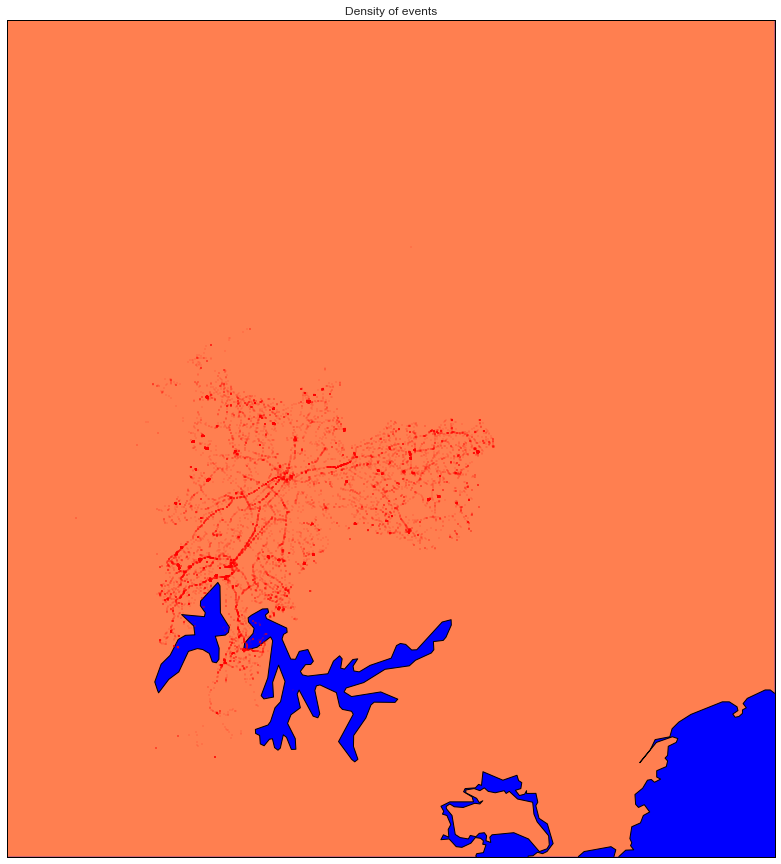

In [21]:
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# resolution = 'c' means use crude resolution coastlines.
m = Basemap(projection='merc',llcrnrlat=-24,urcrnrlat=-23,\
            llcrnrlon=-47,urcrnrlon=-46,resolution='h')
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.fillcontinents(color='coral',lake_color='blue')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='blue')
plt.title("Density of events")

for x in range(30000):
    m.plot(df.lon[x],df.lat[x],'ro',latlon=True,ms=1,alpha=.5)

plt.show()